CNN\Convulated Neural network

#**The MNIST Dataset**


MNIST: *Modified National Institute of Standards and Technology*

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.optimizers import Adam # - Works ,RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from keras import  backend as K
from keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
import random
random.seed(0)

import warnings
warnings.filterwarnings('ignore')


In [2]:
# import dataset
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


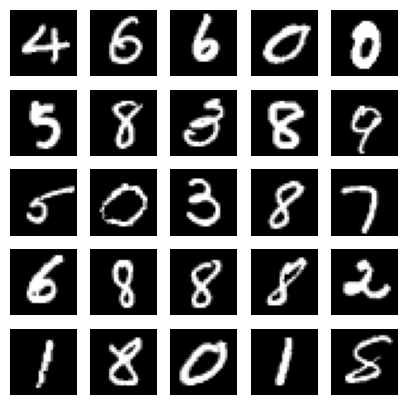

In [5]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
# plt.savefig("mnist-samples.png")
# plt.close('all')

In [6]:
# compute the number of labels
num_labels = len(np.unique(y_train))
num_labels

10

In [7]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [10]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size]) #add -1 to match new reshape with original train data.
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [11]:
x_train.shape

(60000, 784)

In [12]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [13]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size,activation = 'relu'))
model.add(Dense(hidden_units,activation = 'relu'))
model.add(Dense(num_labels, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


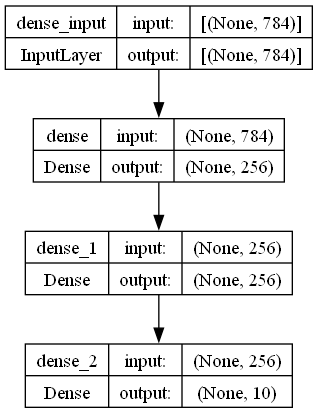

In [15]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.3)

Epoch 1/20


329/329 [==============================] - 3s 6ms/step - loss: 0.3113 - accuracy: 0.9098 - val_loss: 0.1547 - val_accuracy: 0.9539
Epoch 2/20
329/329 [==============================] - 2s 6ms/step - loss: 0.1165 - accuracy: 0.9650 - val_loss: 0.1212 - val_accuracy: 0.9634
Epoch 3/20
329/329 [==============================] - 2s 6ms/step - loss: 0.0736 - accuracy: 0.9779 - val_loss: 0.0978 - val_accuracy: 0.9707
Epoch 4/20
329/329 [==============================] - 2s 6ms/step - loss: 0.0514 - accuracy: 0.9843 - val_loss: 0.0896 - val_accuracy: 0.9742
Epoch 5/20
329/329 [==============================] - 2s 6ms/step - loss: 0.0390 - accuracy: 0.9882 - val_loss: 0.1024 - val_accuracy: 0.9709
Epoch 6/20
329/329 [==============================] - 2s 5ms/step - loss: 0.0266 - accuracy: 0.9923 - val_loss: 0.0906 - val_accuracy: 0.9746
Epoch 7/20
329/329 [==============================] - 2s 6ms/step - loss: 0.0206 - accuracy: 0.9937 - val_loss: 0.0990 - val_accuracy: 0.9741
Epoc

In [18]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 0s 1ms/step - loss: 0.1009 - accuracy: 0.9802

Test accuracy: 98.0%


In [19]:
loss, acc = model.evaluate(x_train, y_train)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0396 - accuracy: 0.9929

Test accuracy: 99.3%


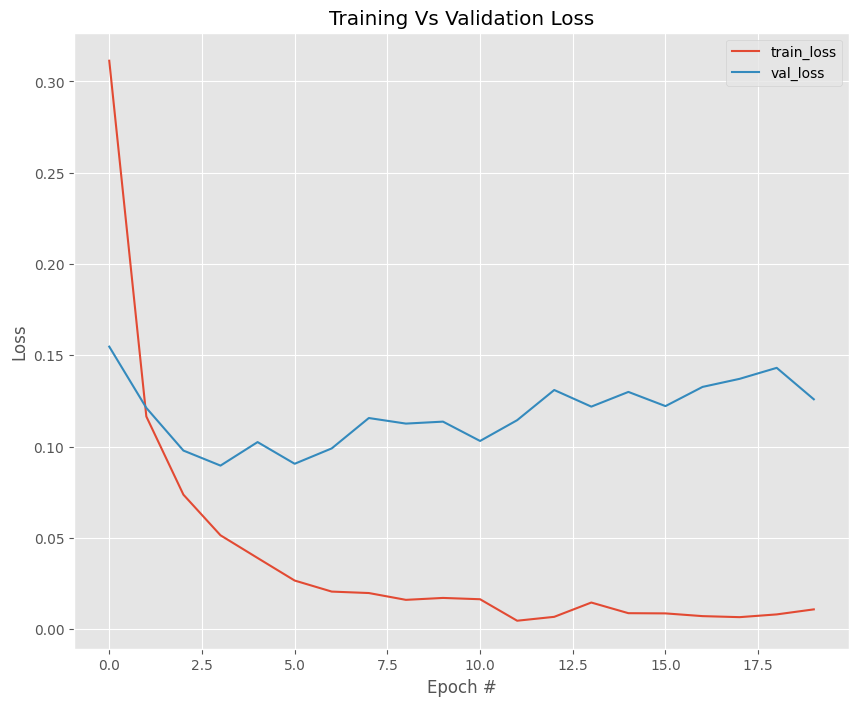

In [20]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Adding L2 Regualarisation

In [21]:
from keras.layers import Dense , Activation, Dropout
import keras


model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))



model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size,validation_split=0.3) #you can specify a validation set or not (it's optional). You can add "validation_split=0.3" in case you want to add validation set.

Epoch 1/20
329/329 [==============================] - 3s 8ms/step - loss: 0.4932 - accuracy: 0.9105 - val_loss: 0.3029 - val_accuracy: 0.9489
Epoch 2/20
329/329 [==============================] - 2s 7ms/step - loss: 0.2396 - accuracy: 0.9608 - val_loss: 0.2196 - val_accuracy: 0.9605
Epoch 3/20
329/329 [==============================] - 2s 7ms/step - loss: 0.1780 - accuracy: 0.9719 - val_loss: 0.1834 - val_accuracy: 0.9693
Epoch 4/20
329/329 [==============================] - 2s 7ms/step - loss: 0.1487 - accuracy: 0.9762 - val_loss: 0.1784 - val_accuracy: 0.9653
Epoch 5/20
329/329 [==============================] - 2s 7ms/step - loss: 0.1325 - accuracy: 0.9787 - val_loss: 0.1622 - val_accuracy: 0.9703
Epoch 6/20
329/329 [==============================] - 2s 7ms/step - loss: 0.1220 - accuracy: 0.9806 - val_loss: 0.1705 - val_accuracy: 0.9670
Epoch 7/20
329/329 [==============================] - 2s 7ms/step - loss: 0.1157 - accuracy: 0.9818 - val_loss: 0.1607 - val_accuracy: 0.9706
Epoch 

In [22]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.1253 - accuracy: 0.9767

Test accuracy: 97.7%


In [23]:
loss, acc = model.evaluate(x_train, y_train)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0933 - accuracy: 0.9869

Test accuracy: 98.7%


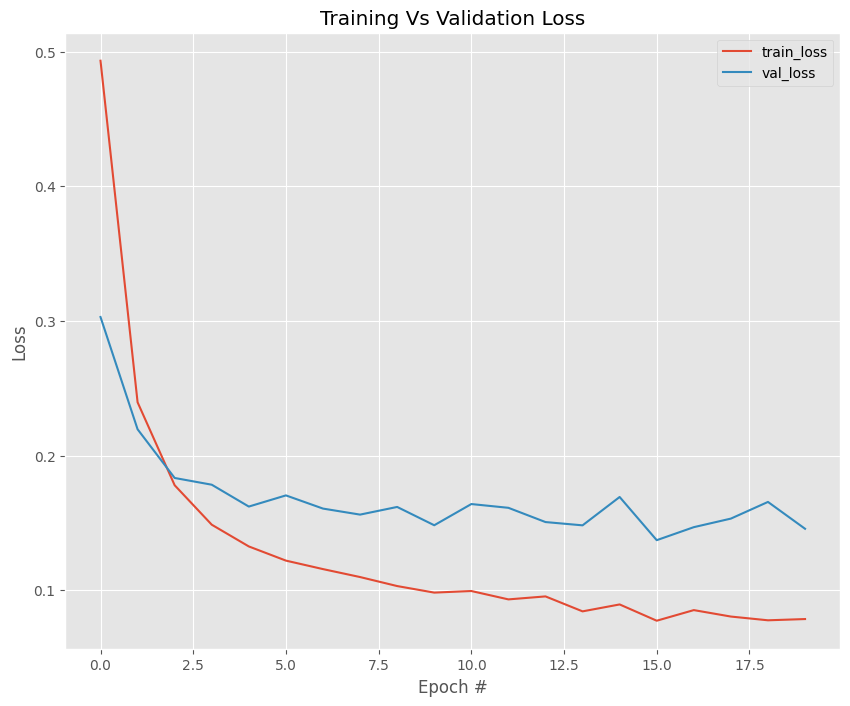

In [24]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Adding Dropout

In [25]:
from keras.layers import Dense , Activation, Dropout

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))



model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size,validation_split=0.3) #you can specify a validation set or not (it's optional). You can add "validation_split=0.3" in case you want to add validation set.

Epoch 1/20
329/329 [==============================] - 4s 9ms/step - loss: 0.5122 - accuracy: 0.8393 - val_loss: 0.1848 - val_accuracy: 0.9445
Epoch 2/20
329/329 [==============================] - 2s 8ms/step - loss: 0.2240 - accuracy: 0.9339 - val_loss: 0.1367 - val_accuracy: 0.9594
Epoch 3/20
329/329 [==============================] - 2s 7ms/step - loss: 0.1713 - accuracy: 0.9488 - val_loss: 0.1180 - val_accuracy: 0.9647
Epoch 4/20
329/329 [==============================] - 2s 7ms/step - loss: 0.1451 - accuracy: 0.9555 - val_loss: 0.1056 - val_accuracy: 0.9689
Epoch 5/20
329/329 [==============================] - 2s 7ms/step - loss: 0.1261 - accuracy: 0.9614 - val_loss: 0.1038 - val_accuracy: 0.9699
Epoch 6/20
329/329 [==============================] - 2s 7ms/step - loss: 0.1123 - accuracy: 0.9659 - val_loss: 0.0988 - val_accuracy: 0.9708
Epoch 7/20
329/329 [==============================] - 2s 7ms/step - loss: 0.1009 - accuracy: 0.9679 - val_loss: 0.0914 - val_accuracy: 0.9738
Epoch 

In [26]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 0s 1ms/step - loss: 0.0776 - accuracy: 0.9788

Test accuracy: 97.9%


In [27]:
loss, acc = model.evaluate(x_train, y_train)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0358 - accuracy: 0.9905

Test accuracy: 99.0%


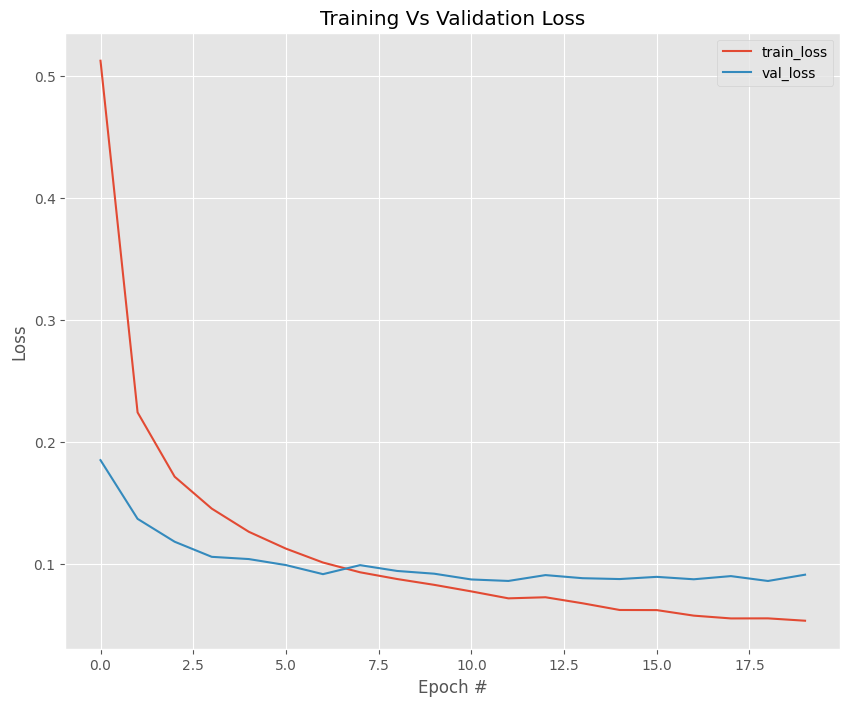

In [28]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()


Combine both L2 and Dropout




In [29]:
from keras.regularizers import l2
from keras.layers import Dense, Activation, Dropout

model = Sequential()

# First hidden layer with L2 regularization and ReLU activation
model.add(Dense(hidden_units, input_dim=input_size, kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(dropout))

# Second hidden layer with L2 regularization and ReLU activation
model.add(Dense(hidden_units, kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(dropout))

# Output layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.3)


Epoch 1/20
329/329 [==============================] - 3s 7ms/step - loss: 0.9046 - accuracy: 0.8419 - val_loss: 0.4976 - val_accuracy: 0.9447
Epoch 2/20
329/329 [==============================] - 2s 6ms/step - loss: 0.5013 - accuracy: 0.9292 - val_loss: 0.3784 - val_accuracy: 0.9522
Epoch 3/20
329/329 [==============================] - 2s 6ms/step - loss: 0.3954 - accuracy: 0.9414 - val_loss: 0.3168 - val_accuracy: 0.9563
Epoch 4/20
329/329 [==============================] - 2s 6ms/step - loss: 0.3413 - accuracy: 0.9485 - val_loss: 0.2826 - val_accuracy: 0.9617
Epoch 5/20
329/329 [==============================] - 2s 6ms/step - loss: 0.3111 - accuracy: 0.9510 - val_loss: 0.2646 - val_accuracy: 0.9626
Epoch 6/20
329/329 [==============================] - 2s 7ms/step - loss: 0.2976 - accuracy: 0.9533 - val_loss: 0.2595 - val_accuracy: 0.9628
Epoch 7/20
329/329 [==============================] - 2s 6ms/step - loss: 0.2870 - accuracy: 0.9552 - val_loss: 0.2376 - val_accuracy: 0.9692
Epoch 

In [30]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.2111 - accuracy: 0.9724

Test accuracy: 97.2%


In [31]:
loss, acc = model.evaluate(x_train, y_train)
print("\nTrain accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 3s 2ms/step - loss: 0.1965 - accuracy: 0.9789

Train accuracy: 97.9%


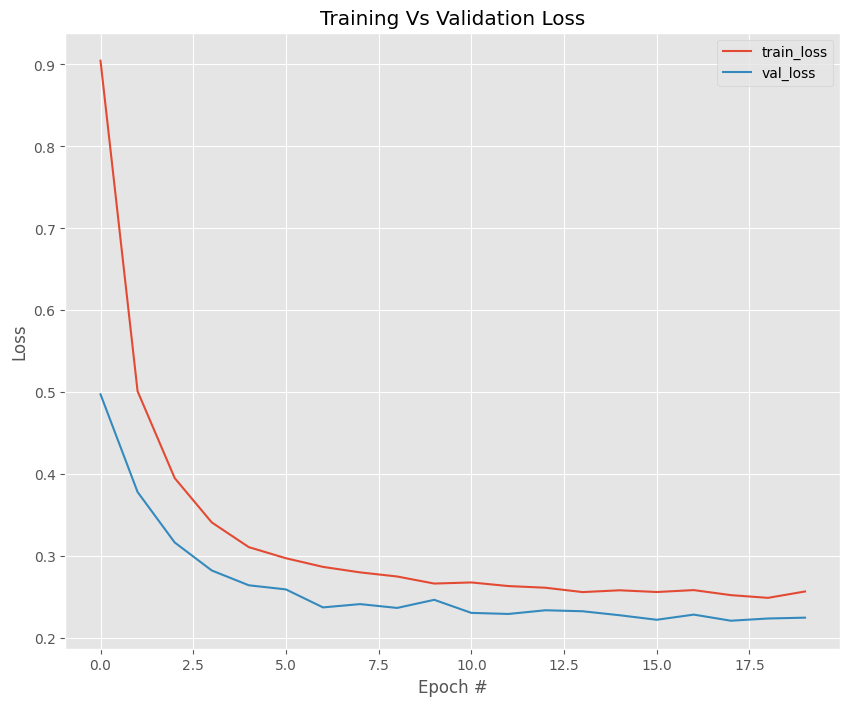

In [32]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()